In [1]:
import numpy as np
import pylab as pl
import pandas as pd
pl.style.use('fivethirtyeight')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mta = np.load('MTA_Fare.npy')
type = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
mta = np.where(mta<0, 'Nan', mta)
mta = mta.astype(float)

In [4]:
#getting ridership types and setting date range
stations = np.nansum(mta, axis=0)
print stations.shape
time = pd.date_range('05/21/2010', periods=194, freq='w')

(23, 194)


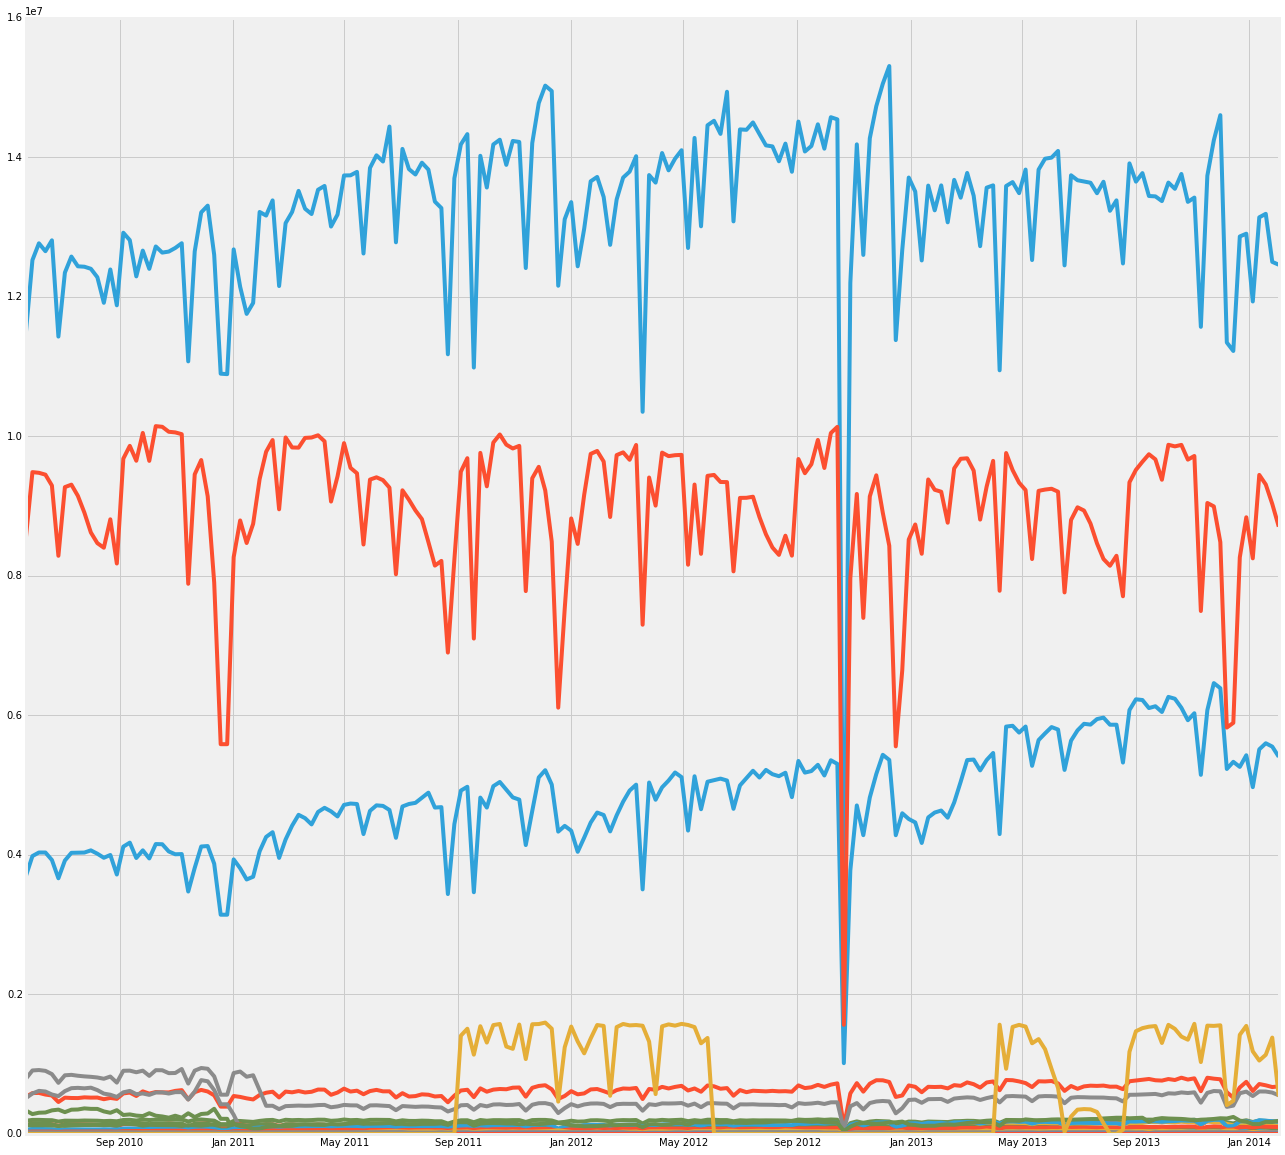

In [5]:
#plotting all the rides types
figure, ax = pl.subplots(figsize=(20,20))
ax.plot(time, np.transpose(stations))


In [6]:
#smoothing out the lines
rolling_mean = pd.rolling_mean(np.transpose(stations), 10)

In [7]:
print rolling_mean.shape

(194, 23)


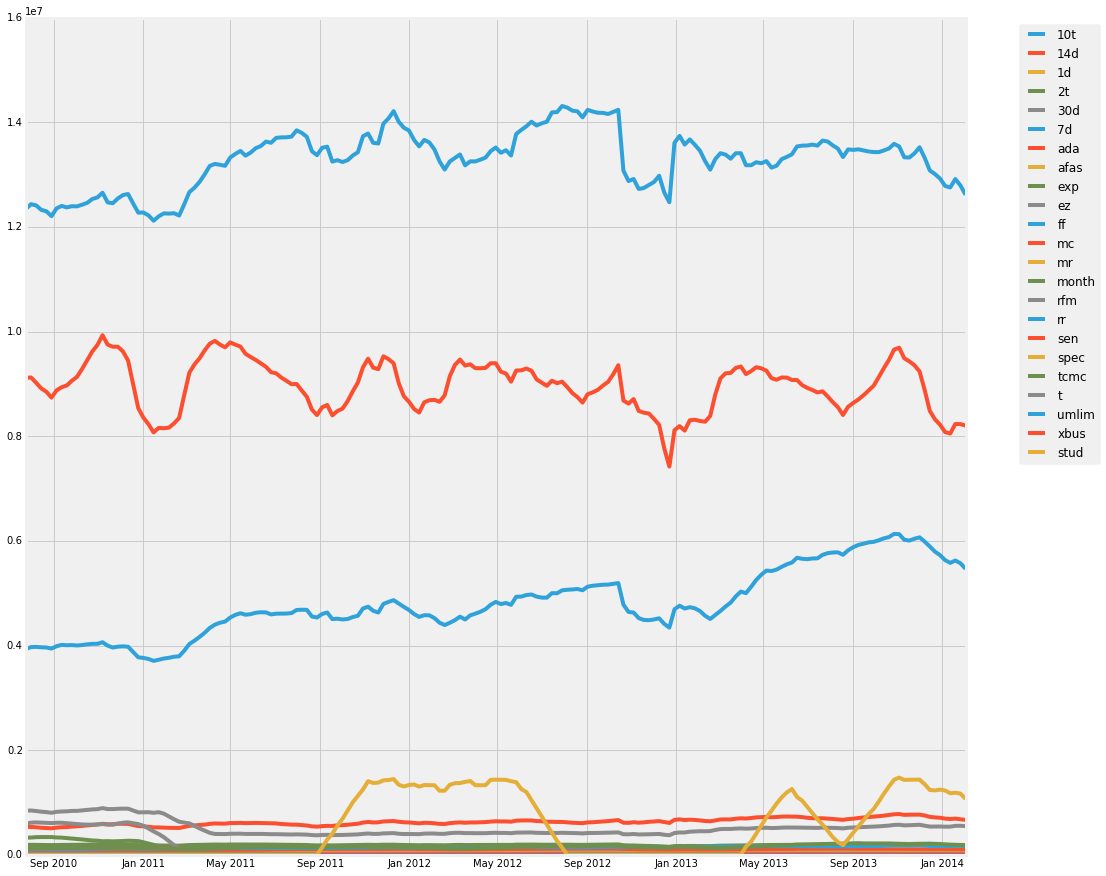

In [8]:
#plotting new graph with smmoother lines
figure, ax = pl.subplots(figsize=(15,15))
ax.plot(time, rolling_mean)
ax.legend(type, bbox_to_anchor=(1.1, 1.0), loc=9)


Eye-balling it, the averages seem to be stationary.

In [9]:
#if you want to see trends of the first week compared to the last week, we can just divide
ratio = rolling_mean[10,:]/rolling_mean[193,:]

In [10]:
ratio

array([  9.85855761e-01,   7.96898334e-01,   9.01896857e-01,
         1.07217516e+00,   9.83155326e-01,   7.26253084e-01,
         1.11214933e+00,   4.80765217e+03,   9.42633429e+04,
         6.82381556e+05,   1.23714609e+00,   8.30622261e-01,
         3.89558171e-05,   1.74222625e+00,   1.54426917e+00,
         3.87513943e-01,   3.47208425e-01,   5.46373828e-02,
         6.53059649e-01,   9.80984190e-01,   1.26020779e+00,
         6.18746842e-01,   0.00000000e+00])

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


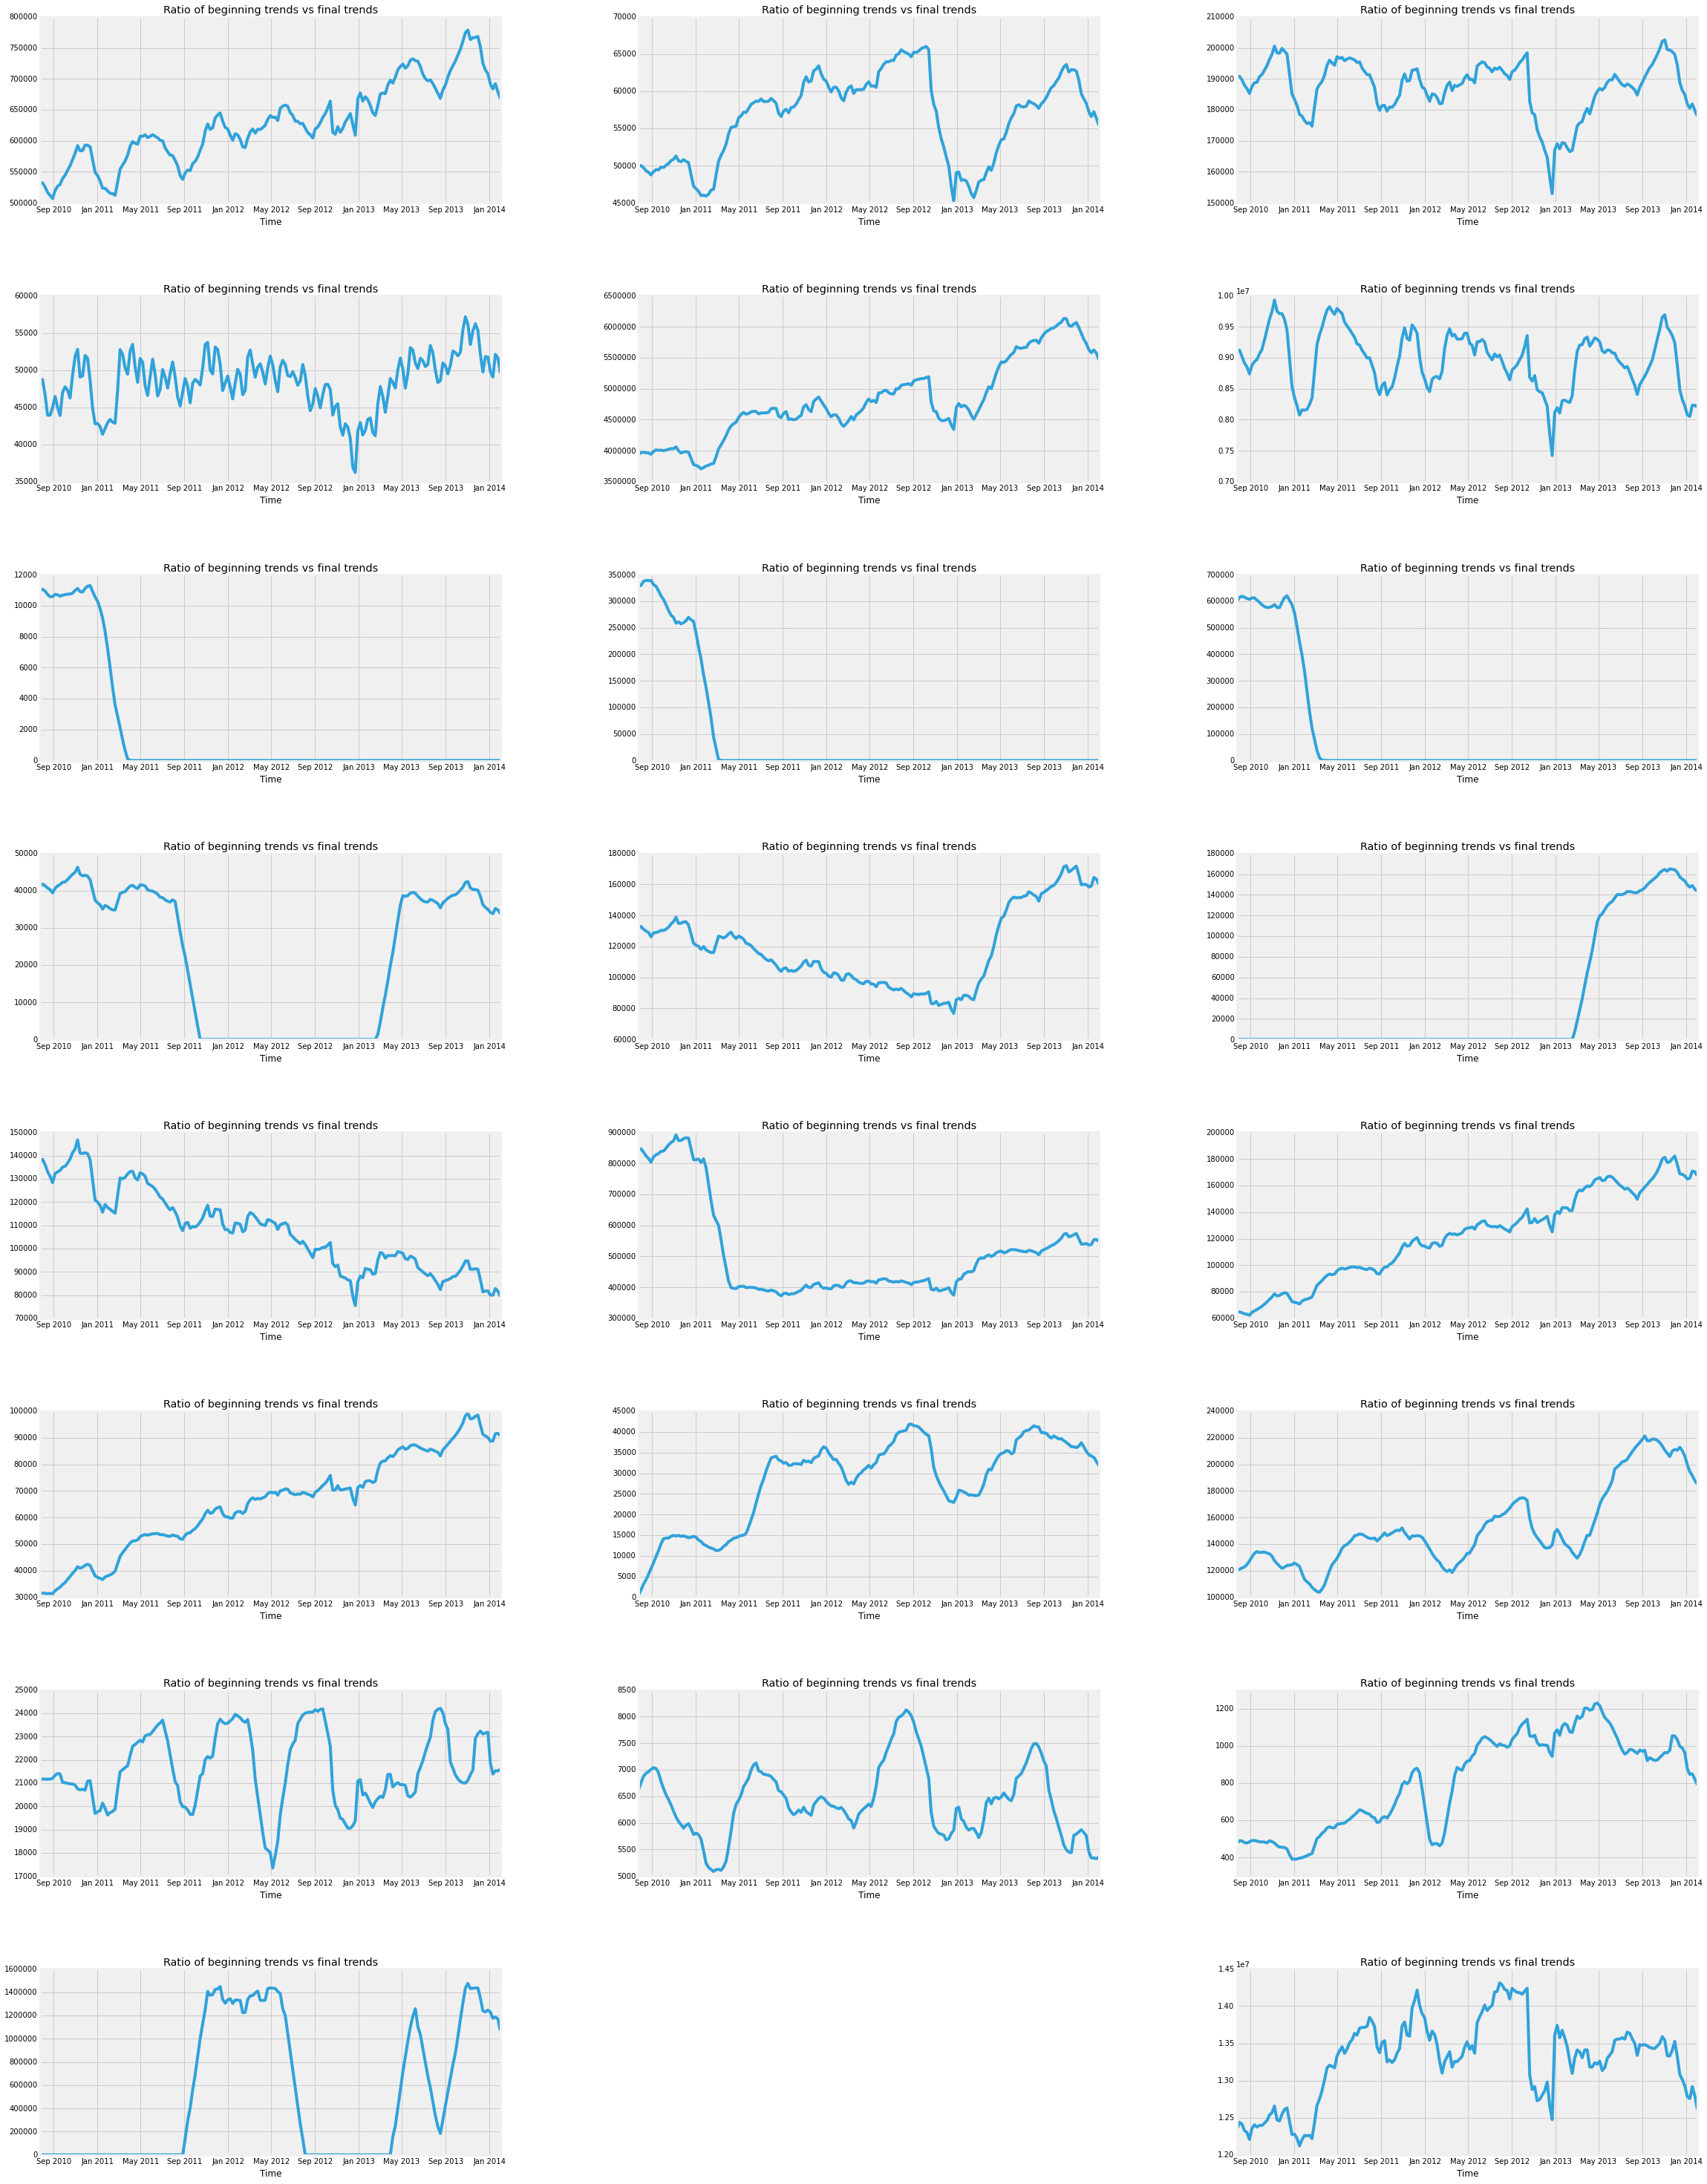

In [11]:
#plotting the ratios individually 
x = 0
pl.figure(figsize=(40,40))
for i in ratio:
    pl.subplot(8,3, x)
    pl.plot(time, rolling_mean[:, x])
    x += 1
    pl.title('Ratio of beginning trends vs final trends')
    pl.xlabel('Time')
    pl.subplots_adjust(wspace=.3, hspace=.5, left=.125, right=.9, top=1, bottom=0)

In [12]:
#printing the ride type and the trend they are exhibiting
n=0
for c in ratio:
    print type[n],  c 
    n+=1

10t 0.985855760852
14d 0.796898333792
1d 0.901896856725
2t 1.07217516457
30d 0.983155325608
7d 0.726253084256
ada 1.11214932778
afas 4807.65217391
exp 94263.3428571
ez 682381.555556
ff 1.23714608817
mc 0.830622260682
mr 3.8955817147e-05
month 1.74222624958
rfm 1.54426916954
rr 0.38751394307
sen 0.347208424837
spec 0.0546373827787
tcmc 0.653059648623
t 0.980984189778
umlim 1.26020779318
xbus 0.618746841839
stud 0.0


For 10 (2t, ada, afas, exp, ez, ff, mr, month, rfm, umlim) of the ride types, they a are showing weaker trends than they did in the beginning. For the rest they are showing more positive trends in the end. 